# Recurrent neural networks

In [1]:
%cd ..

/home/quentin/Documents/Courses/Deep learning/Projects/project1/src


In [2]:
import numpy as np

from utils.loading import load_data, save_obj, load_obj

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

%load_ext autoreload
%autoreload 2

from utils.cross_validation import early_stopping
from utils.cross_validation import cross_validation

from utils.visualization import plot_history

In [3]:
x_train, y_train = load_data(one_khz=False)
x_test, y_test = load_data(train=False, one_khz=False)

x_train_one_khz, y_train_one_khz = load_data(one_khz=True)
x_test_one_khz, y_test_one_khz = load_data(train=False, one_khz=True)

## Basic LSTM (one recurrent layer)

In [9]:
from rec_models import LSTMNet1

Let's see how many epochs are needed to tune the parameters :

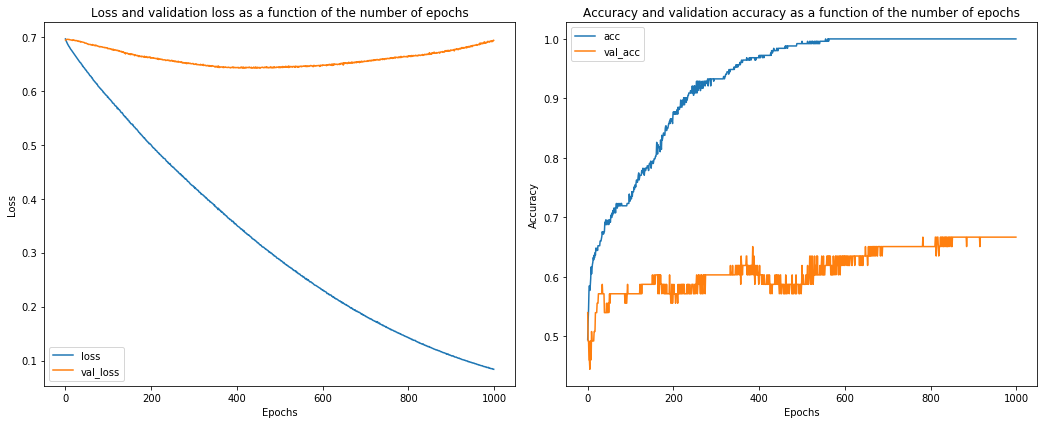

In [46]:
model = LSTMNet1(1400, 128, 1, 2)
history = model.fit(x_train, y_train, validation_data=0.2, epochs=1000, lr=1e-5, batch_size=16,
                    standardize=True, noise=False, crop=False)
plot_history(history)

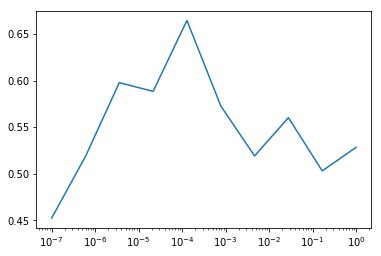

In [19]:
lr_list = np.logspace(-7, 0, 10)

acc_list = []
std_list = []

for lr in lr_list:
    acc, std = cross_validation(lambda: LSTMNet1(1400, 128, 1, 2), x_train, y_train,
                                epochs=1000, lr=lr)
    acc_list.append(acc)
    std_list.append(std)
    
plt.semilogx(lr_list, acc_list)

In [20]:
save_obj((acc_list, std_list), 'cross_val_lr_lstm')

In [21]:
acc_list, std_list = load_obj('cross_val_lr_lstm')
lr_tuned = lr_list[np.argmax(acc_list)]
print('The tuned learning rate is {}.'.format(round(lr_tuned, 6)))

The tuned learning rate is 0.000129.


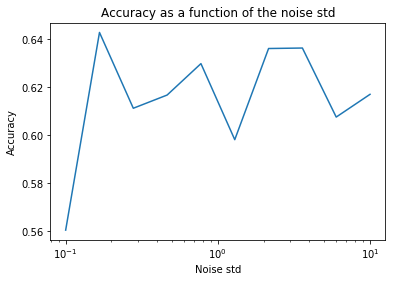

In [22]:
noise_std_list = np.logspace(-1, 1, 10)

acc_list = []
std_list = []

for noise_std in noise_std_list:
    acc, std = cross_validation(lambda: LSTMNet1(1400, 128, 1, 2), x_train, y_train, epochs=1000,
                                lr=lr_tuned, batch_size=16, standardize=True, noise=noise_std, crop=False)
    acc_list.append(acc)
    std_list.append(std)
    
plt.semilogx(noise_std_list, acc_list)
plt.xlabel('Noise std')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the noise std');

In [23]:
save_obj((acc_list, std_list), 'cross_val_noise_lstm')

In [24]:
acc_list, std_list = load_obj('cross_val_noise_lstm')
noise_tuned = noise_std_list[np.argmax(acc_list)]
print('The tuned noise std is {}.'.format(round(noise_tuned, 3)))

The tuned noise std is 0.167.


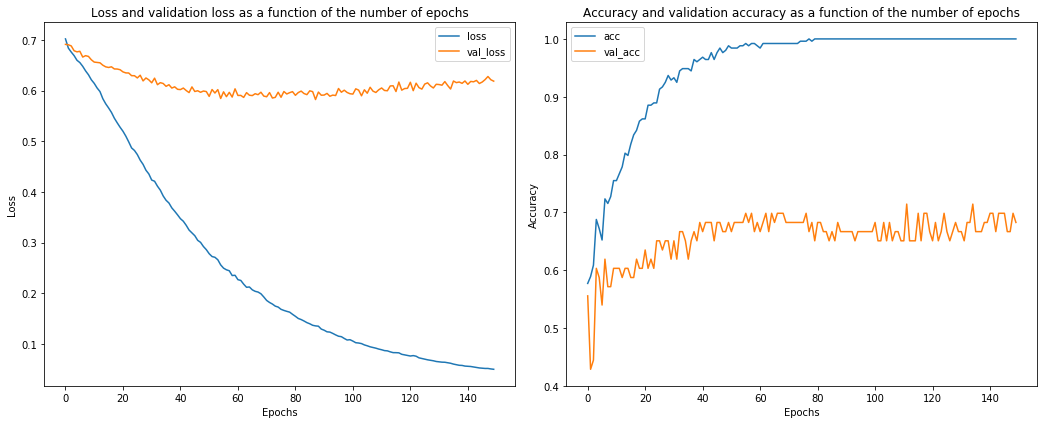

In [31]:
model = LSTMNet1(1400, 128, 1, 2)
history = model.fit(x_train, y_train, validation_data=0.2, epochs=150, lr=1e-4, batch_size=16,
                    standardize=True, noise=False, crop=False, lr_decay=(50, 0.9))
plot_history(history)

In [4]:
from rec_models import LSTMNet1Dropout

In [10]:
acc_list_dp = cross_validation(lambda: LSTMNet1Dropout(1400, 128, 1, 2), x_train, y_train, raw=True,
                               num_folds=10, epochs=500, lr=1e-4, batch_size=16,
                               standardize=True, noise=noise_tuned, crop=False, lr_decay=(10, 0.8))
acc = round(100*np.mean(acc_list_dp), 4)
std = round(100*np.std(acc_list_dp), 4)
print('The accuracy of this model is {0}+/-{1}%'.format(acc, std))

The accuracy of this model is 63.5181+/-10.3004%


## 1d convolution followed by a LSTM

In [11]:
from rec_models import ConvLSTM

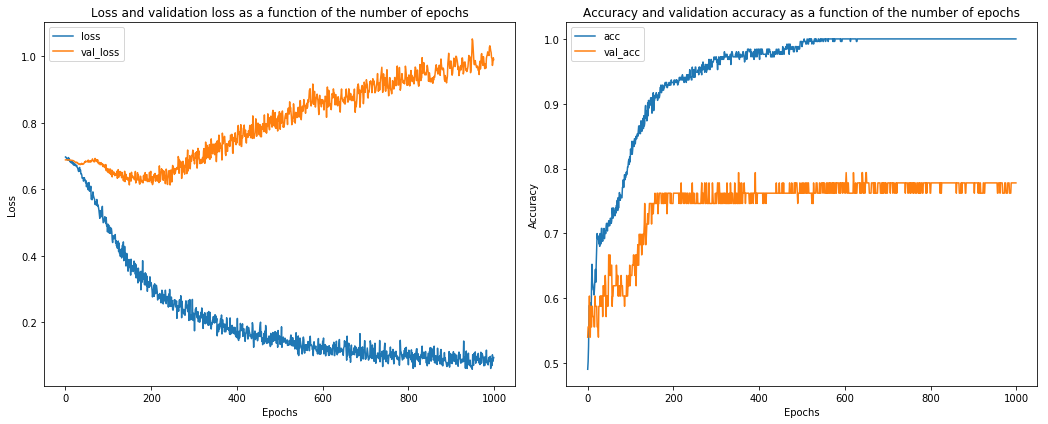

In [13]:
model = ConvLSTM()
history = model.fit(x_train, y_train, validation_data=0.2, epochs=1000, lr=1e-4, batch_size=16,
                    standardize=True, noise=False, crop=False, lr_decay=(50, 0.9))
plot_history(history)

In [20]:
acc_list = cross_validation(lambda: ConvLSTM(), x_train, y_train, raw=True,
                            num_folds=10, epochs=500, lr=1e-4, batch_size=16,
                            standardize=True, noise=noise_tuned, crop=False, lr_decay=(10, 0.8))
acc = round(100*np.mean(acc_list), 4)
std = round(100*np.std(acc_list), 4)
print('The accuracy of this model is {0}+/-{1}%'.format(acc, std))

The accuracy of this model is 64.3246+/-8.4637%


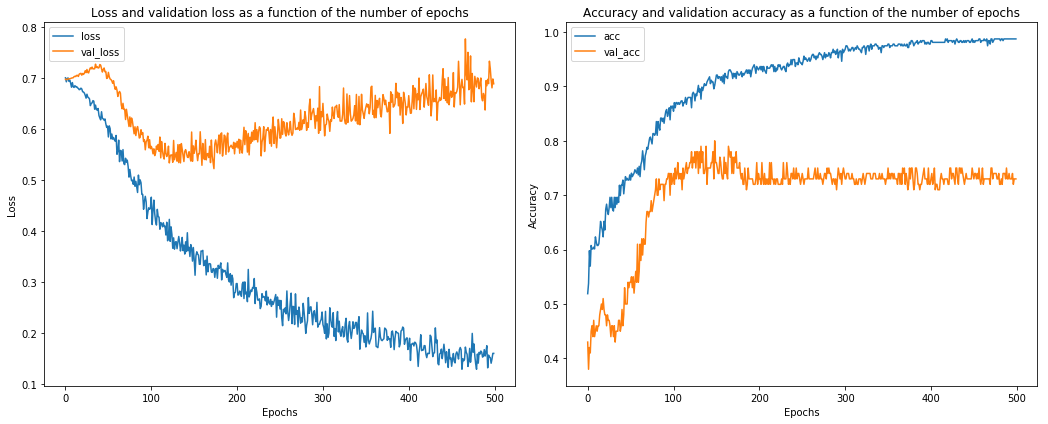

In [16]:
model = ConvLSTM()
history = model.fit(x_train, y_train, x_test, y_test, epochs=500, lr=1e-4, batch_size=16,
                    standardize=True, noise=False, crop=False, lr_decay=(50, 0.9))
plot_history(history)